# Airport Data Analysis 

![](https://i2.wp.com/tmrresearchblog.com/wp-content/uploads/2018/08/Airport-Information-Systems-Market.jpg?fit=1920%2C1080&ssl=1)


This is based off the [Purdue Airport Lab](http://www.stat.purdue.edu/~lfindsen/stat350/Lab1.pdf)

## Import and Data Cleaning

In [1]:
import pandas as pd

# Display up to 120 columns of a dataframe
pd.set_option('display.max_columns', 50)

# Data Visualization
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import style

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
airline = pd.read_table("./data/airline.txt")
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,11,1,6,1001,913,1153,1125,9E,3747,86319E,112,132,99,28,48,DTW,SAV,706,4,9,28.0,0.0,0.0,0.0,0.0
1,2008,11,1,6,2116,2120,2345,2259,9E,2824,85339E,209,159,130,46,-4,MSP,IDA,939,5,74,0.0,0.0,46.0,0.0,0.0
2,2008,11,1,6,1330,1235,1456,1413,9E,2070,91709E,86,98,70,43,55,CVG,PHL,507,4,12,0.0,0.0,0.0,0.0,43.0
3,2008,11,1,6,1435,1400,1539,1518,9E,2024,91629E,64,78,42,21,35,CHS,ATL,259,13,9,0.0,0.0,0.0,0.0,21.0
4,2008,11,1,6,1225,1211,1400,1320,9E,2024,91629E,95,69,47,40,14,ATL,CHS,259,20,28,14.0,0.0,26.0,0.0,0.0


In [3]:
airline.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,10011.0,10011.0,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,10011.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,2008.0,11.0,16.384377,4.494456,1482.934472,1426.216362,1598.885726,1608.629907,2312.868844,141.419239,132.919988,110.244531,52.655179,44.155928,746.302467,7.834682,23.340026,13.855257,1.508953,18.543363,0.037011,18.789937
std,0.0,0.0,8.905032,2.018210,460.834385,430.150666,544.619410,457.892033,2050.525331,72.538741,69.650336,69.413127,50.912616,54.223170,569.000208,6.316822,17.298492,37.894477,12.220310,30.123742,1.011256,34.802203
min,2008.0,11.0,1.000000,1.000000,1.000000,50.000000,1.000000,1.000000,1.000000,22.000000,27.000000,12.000000,-25.000000,-25.000000,31.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2008.0,11.0,9.000000,3.000000,1130.000000,1101.000000,1256.000000,1255.000000,677.500000,89.000000,82.000000,60.000000,22.000000,8.000000,336.000000,4.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.0,11.0,15.000000,5.000000,1523.000000,1445.000000,1709.000000,1650.000000,1590.000000,125.000000,115.000000,92.000000,34.000000,30.000000,594.000000,6.000000,18.000000,0.000000,0.000000,9.000000,0.000000,0.000000
75%,2008.0,11.0,24.000000,6.000000,1845.000000,1757.000000,2028.500000,2000.000000,3481.500000,174.000000,164.000000,139.000000,65.000000,61.000000,976.000000,9.000000,29.000000,14.000000,0.000000,23.000000,0.000000,24.000000
max,2008.0,11.0,30.000000,7.000000,2400.000000,2356.000000,2400.000000,2359.000000,7813.000000,645.000000,660.000000,609.000000,1308.000000,1286.000000,4962.000000,105.000000,201.000000,1194.000000,368.000000,401.000000,54.000000,347.000000


This data set has the following variables:
* 22 quantiatve columns
* 4 qualitative columns
* 26 columns in total

In [4]:
print("# off observations: ",len(airline))

# off observations:  10011


Below are the number of null values in every column.

In [5]:
airline.isnull().sum(axis = 0)  # NA by column
#airline.isna().sum()           # also NA by column
#airline.isnull().sum(axis = 1) # NA by row

Year                  0
Month                 0
DayofMonth            0
DayOfWeek             0
DepTime               0
CRSDepTime            0
ArrTime               0
CRSArrTime            0
UniqueCarrier         0
FlightNum             0
TailNum               0
ActualElapsedTime     0
CRSElapsedTime        0
AirTime               0
ArrDelay              0
DepDelay              0
Origin                0
Dest                  0
Distance              0
TaxiIn                0
TaxiOut               0
CarrierDelay         14
WeatherDelay         14
NASDelay             14
SecurityDelay        14
LateAircraftDelay    14
dtype: int64

In [6]:
airline = airline.dropna()

Change airport codes to full name:
- ATL → Atlanta (Hartsfield Jackson Atlanta International Airport),
- CHS →CharlestonAFB (Charleston Air Force Base International Airport),
- DFW → DallasFtWorth (Dallas Fort Worth International Airport),
- MSP → MinneapolisStPaul (Minneapolis-St Paul International/Wold-Chamberlain Airport)

In [7]:
airline.loc[airline.Origin == "ATL", "Origin"] = "Atlanta"
airline.loc[airline.Dest == "ATL", "Dest"] = "Atlanta"

airline.loc[airline.Origin == "CHS", "Origin"] = "CharlestonAFB"
airline.loc[airline.Dest == "CHS", "Dest"] = "CharlestonAFB"

airline.loc[airline.Origin == "DFW", "Origin"] = "DallasFtWorth"
airline.loc[airline.Dest == "DFW", "Dest"] = "DallasFtWorth"

airline.loc[airline.Origin == "MSP", "Origin"] = "MinneapolisStPaul"
airline.loc[airline.Dest == "MSP", "Dest"] = "MinneapolisStPaul"


In [8]:
airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,11,1,6,1001,913,1153,1125,9E,3747,86319E,112,132,99,28,48,DTW,SAV,706,4,9,28.0,0.0,0.0,0.0,0.0
1,2008,11,1,6,2116,2120,2345,2259,9E,2824,85339E,209,159,130,46,-4,MinneapolisStPaul,IDA,939,5,74,0.0,0.0,46.0,0.0,0.0
2,2008,11,1,6,1330,1235,1456,1413,9E,2070,91709E,86,98,70,43,55,CVG,PHL,507,4,12,0.0,0.0,0.0,0.0,43.0
3,2008,11,1,6,1435,1400,1539,1518,9E,2024,91629E,64,78,42,21,35,CharlestonAFB,Atlanta,259,13,9,0.0,0.0,0.0,0.0,21.0
4,2008,11,1,6,1225,1211,1400,1320,9E,2024,91629E,95,69,47,40,14,Atlanta,CharlestonAFB,259,20,28,14.0,0.0,26.0,0.0,0.0


recalculation the `ActualElapsedTime` using the values in the dataset

In [9]:
airline["ActualElapsedTime_"] = airline.AirTime + airline.TaxiIn + airline.TaxiOut

## 02 Descriptive Statistics

[Purdue Lab 2](https://i2.wp.com/tmrresearchblog.com/wp-content/uploads/2018/08/Airport-Information-Systems-Market.jpg?fit=1920%2C1080&ssl=1)

Part A: create numerical summaries, histograms and boxplots describing the `actual elapsed time` in the airlines dataset

In [10]:
# numerical summaries ( five-number summary)
airline.ActualElapsedTime.describe()

count    9997.000000
mean      141.416925
std        72.557178
min        22.000000
25%        89.000000
50%       125.000000
75%       174.000000
max       645.000000
Name: ActualElapsedTime, dtype: float64

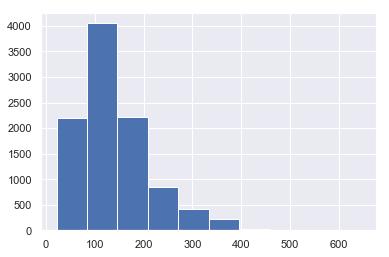

In [11]:
# histogram 
airline.ActualElapsedTime.hist()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


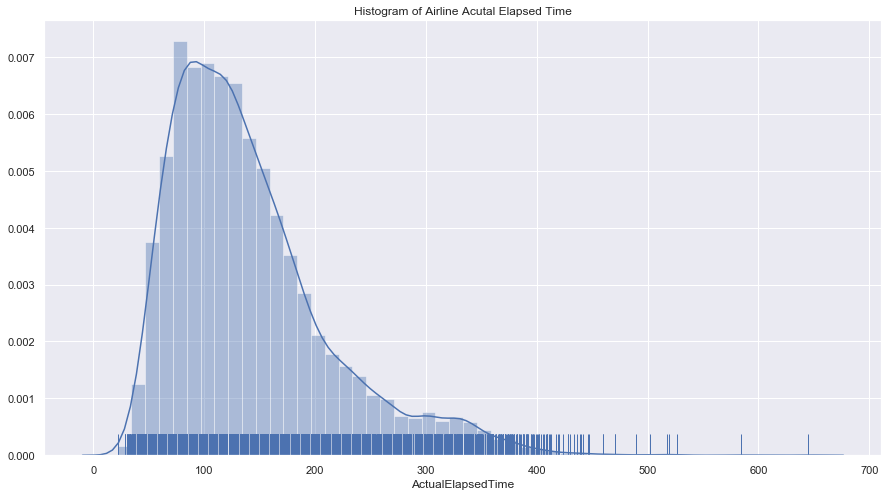

In [12]:
# a better histogram with a density function
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(airline.ActualElapsedTime, kde=True, rug=True)
plt.title("Histogram of Airline Acutal Elapsed Time")
plt.show()

The above histogram appears to be skewed right with a couple of outliers existing past 450 mins of `Actual Elasped time`

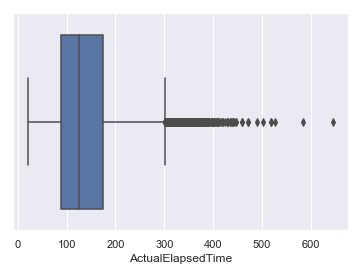

In [13]:
# boxplot
sns.boxplot(x = airline.ActualElapsedTime)

The above boxplot provides insights into whether the data is symmetric or not and shows the outliers. We can see the 25th, 50th and 75th percentiles are somewhat equally spaced out, however, the boxplot appears to be positively skweed (right) with outliers indicated greater then 300.

find $\bar{x}$ and $s$ and explain the median

In [14]:
print(" x-bar : ", airline.ActualElapsedTime.mean())
print(" standard deviation : ", airline.ActualElapsedTime.std())
print(" median : ", airline.ActualElapsedTime.median())

 x-bar :  141.41692507752325
 standard deviation :  72.55717775137741
 median :  125.0


As we can see from the above summary statistics since the mean is greater than the median, this indicated that the data is being pulled positively (viz. right skew). Additionally, we can see that 

_If you had only one number to estimate the actual elapsed time of airline
flights in November based on this dataset, what would it be?_

Due to the amount of outliers, the median would be the best statistical esitmate for the actual elapsed of time, as the median is resitant to outliers. If a few data points for test score were extremely low or extremely high, it could have a significant effect on the mean, but the median would be relatively unaffected.
 


#### Part B. 

graphical and numeric summaries of the time (minutes) that it takes for
the flights to arrive at the gate after they land (TaxiIn)

In [15]:
# numerical summaries
taxiin_iqr = pd.DataFrame(airline.TaxiIn.describe()).T
taxiin_iqr

,count,mean,std,min,25%,50%,75%,max
TaxiIn,9997.0,7.837851,6.320316,1.0,4.0,6.0,9.0,105.0


In [16]:
# calcluate outliers
iqr = (taxiin_iqr['75%'] - taxiin_iqr['25%']) * 1.5
qt1_iqr = (taxiin_iqr['25%'][0] - iqr[0])
qt3_iqr = (taxiin_iqr['75%'][0] + iqr[0])

print("outliers interval: {} - {}".format(qt1_iqr, qt3_iqr))
print("# of outliers: ", len(airline[airline.TaxiIn > qt3_iqr]))

outliers interval: -3.5 - 16.5
# of outliers:  655


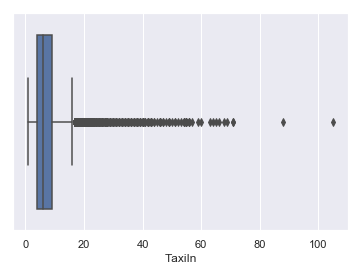

In [17]:
# boxplot
sns.boxplot(x = airline.TaxiIn)

The boxplot above for `TaxiIn` is positively skewed right with a large amount of outliers. 

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


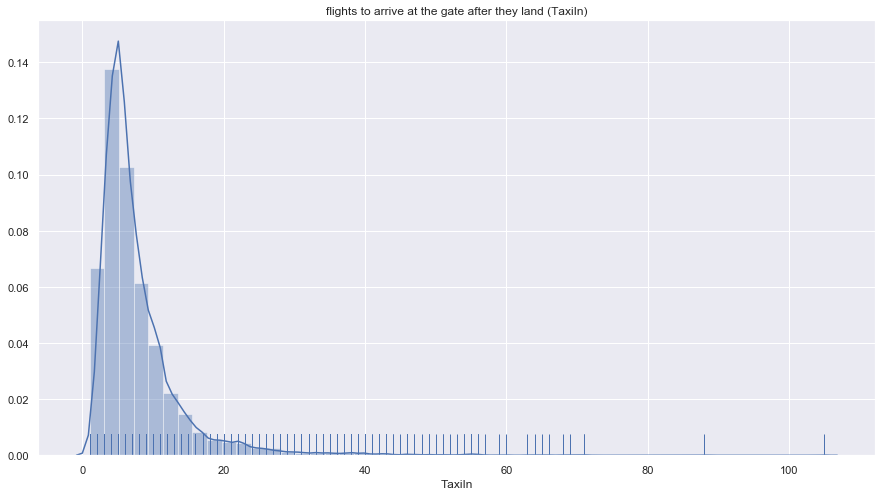

In [18]:
# histogram with a density function
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(airline.TaxiIn, kde=True, rug=True)
plt.title("flights to arrive at the gate after they land (TaxiIn)")
plt.show()

Right skew

## 03 Testing Normality

#### Creating and Interpreting Normal Probability Plots (QQ Plots)
#### Part C: The distribution of the air time of flights

A flight analyst is interested in the normality of the elapsed air time of the fights (AirTime)

[Purdue](http://www.stat.purdue.edu/~lfindsen/stat350/Lab3.pdf)

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


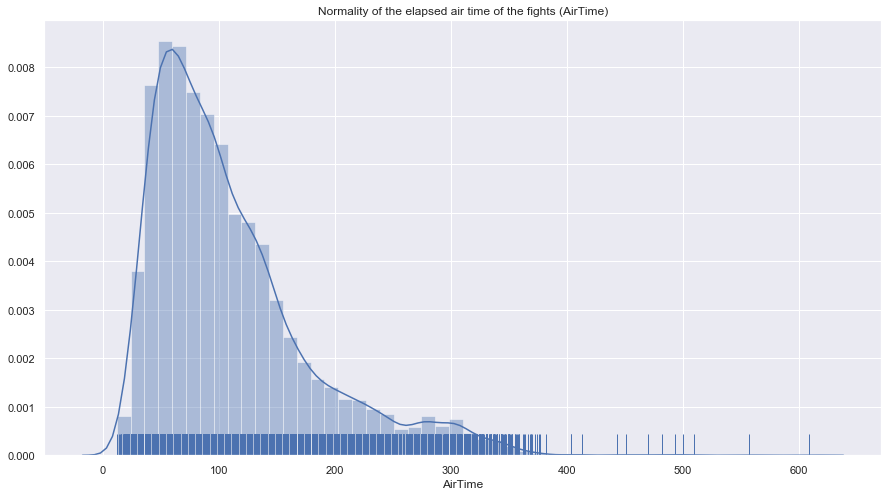

In [19]:
# histogram with a density function
fig = plt.figure(figsize=(15,8))
ax = sns.distplot(airline.AirTime, kde=True, rug=True)
plt.title("Normality of the elapsed air time of the fights (AirTime)")
plt.show()

The histogram above is a right skewed distribtuion, indicating non-normality. 

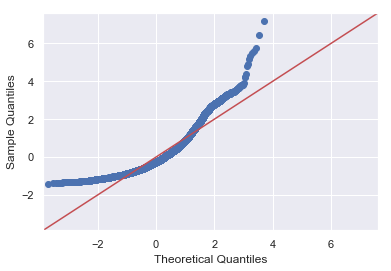

In [20]:
import statsmodels.api as sm
fig = sm.qqplot(airline.AirTime, fit=True, line='45')
plt.show()

Evaluating the QQ plot, the plotted observations appears to not fit the linear line, indicating non normality. 

# 05 Confidence Intervals and T-Test


> use the “ActualElapsedTime” variable to:
Create a histogram, boxplot, and a Normal quantile plot of these data. Do you
think that these data are normally distributed? Are there any outliers? Please justify
your answer by referring to the graphs.

[Lab 6](http://www.stat.purdue.edu/~lfindsen/stat350/Lab6.pdf)

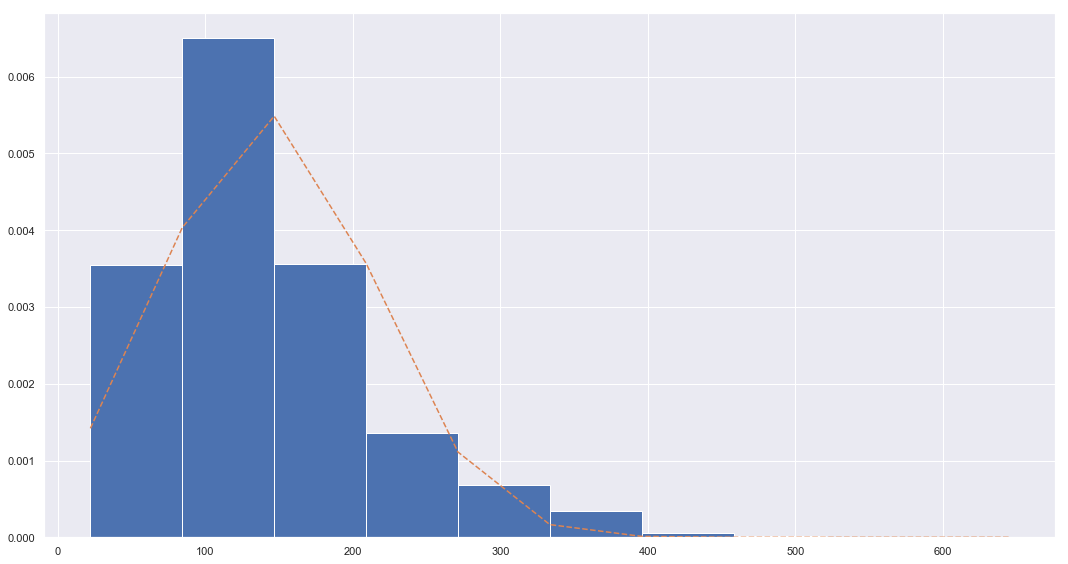

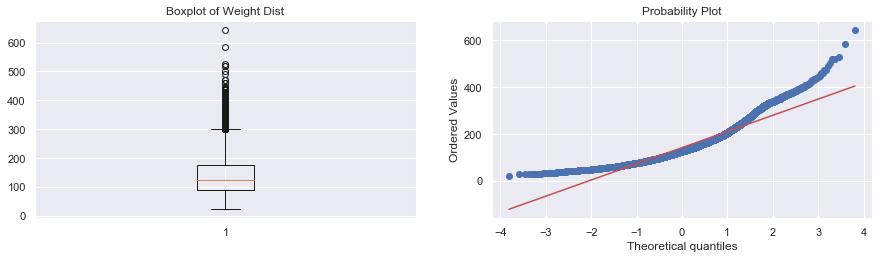

In [22]:
# import a python file i created to provide the assumption diagnostics
import mystats

mystats.descriptive_statistics_plots(airline.ActualElapsedTime)

#### Assumption Analysis

The distribution is right skewed with a long tail and with an outlier at high values. We can also see the indication of outliers in the boxplot. The QQ Probability Plot is curved upward (concave). Therefore, the `Actual Elapsed Time` feature variable is not normal and would recommend performing data transformation (e.g., log transformation) or use a non-parametric test to test the hypothesis. 

> log transformation -  One of the ways of creating a normal distribution from a non-normal
distribution is to take the log transformation. Create a new variable which is the log
transformation of the actual elapsed time. Re-create the histogram, boxplot and
normal quantile plot of the transformed data. Comment on the skewness, outliers,
and Normality of the transformed data. For the rest of this part, please use the
transformed data.

We will utilized a log transformation to create a normal distribtuion from a non-normal distribution. 

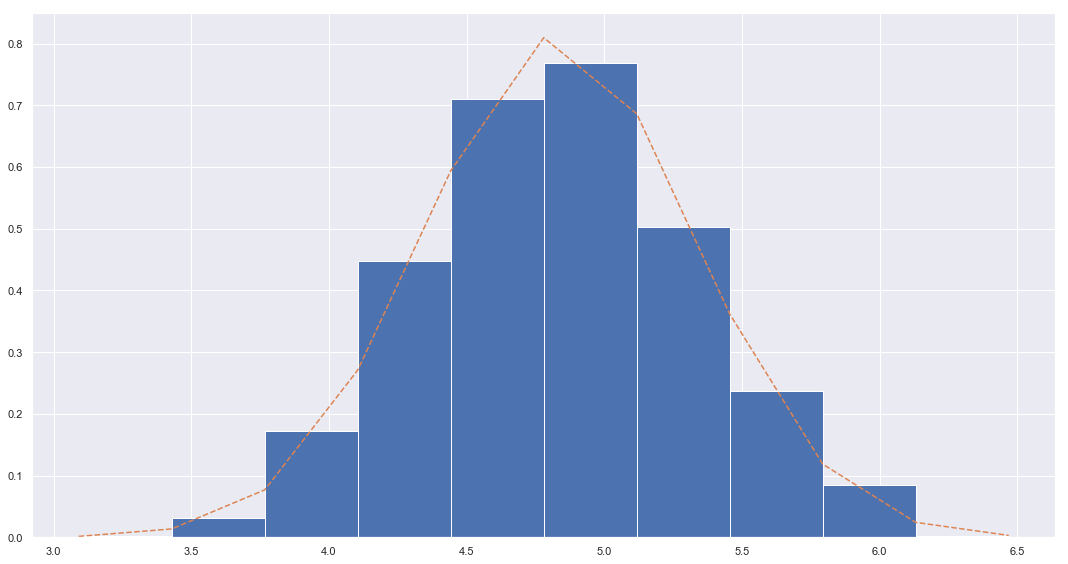

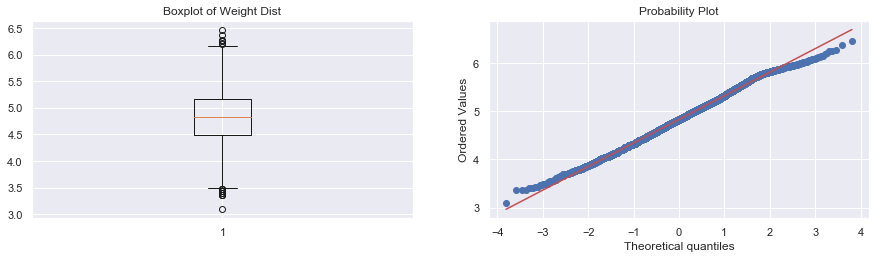

In [23]:
import numpy as np
airline['log_ActualElapsedTime'] = np.log(airline.ActualElapsedTime)

mystats.descriptive_statistics_plots(airline.log_ActualElapsedTime)

The histogram is symmetric, the QQ plot shows observations plotted in a linear fashion. The Box plot provides appearance of constant variance. Therefore, with the log transformation, this distribution is normal and we can use the t-distribution.

> Find the mean, standard deviation, standard error, and margin of error for a
confidence level of 99%. From these values, compute the 99% CI for μ. The CI is
NOT to be calculated from the software package though the values mentioned in the
first sentence maybe calculated via software. If the numbers are obtained via a
software, please include the appropriate output. If the numbers are calculated by
hand, please show your work. Work is required for the calculation of the CI.

In [26]:
import scipy.stats as stats
stat, p = stats.ttest_1samp(airline.log_ActualElapsedTime,0)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
mystats.interpret(p, alpha_level= alpha)
    
# Confidence Interval

Statistics=985.559, p=0.000
Different distribution (reject H0)


# 07 - Two-Sample CI and HT

[Purdue Lab 7](http://www.stat.purdue.edu/~lfindsen/stat350/Lab7.pdf)

# 08 -  One-Way ANOVA


[Purdue Lab 8](http://www.stat.purdue.edu/~lfindsen/stat350/Lab8.pdf)

# 09 Linear Regression


[Purdue Lab 9](http://www.stat.purdue.edu/~lfindsen/stat350/Lab9%20updated.pdf)